In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline 
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [2]:
df_listingwr=pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listingwr.csv')
df_listingwr.drop('Unnamed: 0', inplace=True, axis=1)
df_listingwr.head()

D:\Users\ivans\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (0,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,summary,description,neighborhood_overview,notes,house_rules,host_about,transit,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,customers_id,date,reviewer_id,reviewer_name,comments
0,1125097.0,6172214.0,Please note there is a minimum stay of 2 night...,Please note there is a minimum stay of 2 night...,Strathlyn Estate is a very private property su...,When first arriving check in at the Reception ...,Please leave the Coach House in a tidy conditi...,I have been a long time resident of the Baross...,Please ask your host Heather about the local t...,t,...,10.0,10.0,10.0,10.0,97.0,7269778.0,2013-09-13,3053083.0,Stephen,While I didnt have the pleasure of meeting Hea...
1,1125097.0,6172214.0,Please note there is a minimum stay of 2 night...,Please note there is a minimum stay of 2 night...,Strathlyn Estate is a very private property su...,When first arriving check in at the Reception ...,Please leave the Coach House in a tidy conditi...,I have been a long time resident of the Baross...,Please ask your host Heather about the local t...,t,...,10.0,10.0,10.0,10.0,97.0,10081118.0,2014-01-29,1898281.0,Rus,Great host and amazing accommodation! \r\r\n\...
2,1125097.0,6172214.0,Please note there is a minimum stay of 2 night...,Please note there is a minimum stay of 2 night...,Strathlyn Estate is a very private property su...,When first arriving check in at the Reception ...,Please leave the Coach House in a tidy conditi...,I have been a long time resident of the Baross...,Please ask your host Heather about the local t...,t,...,10.0,10.0,10.0,10.0,97.0,10335170.0,2014-02-14,2725224.0,Teresa,"A lovely and convenient location, surrounded b..."
3,1125097.0,6172214.0,Please note there is a minimum stay of 2 night...,Please note there is a minimum stay of 2 night...,Strathlyn Estate is a very private property su...,When first arriving check in at the Reception ...,Please leave the Coach House in a tidy conditi...,I have been a long time resident of the Baross...,Please ask your host Heather about the local t...,t,...,10.0,10.0,10.0,10.0,97.0,10881952.0,2014-03-11,8982612.0,Kathy,A wonderful experience from start to finish . ...
4,1125097.0,6172214.0,Please note there is a minimum stay of 2 night...,Please note there is a minimum stay of 2 night...,Strathlyn Estate is a very private property su...,When first arriving check in at the Reception ...,Please leave the Coach House in a tidy conditi...,I have been a long time resident of the Baross...,Please ask your host Heather about the local t...,t,...,10.0,10.0,10.0,10.0,97.0,11872081.0,2014-04-17,10977428.0,Phillip,The coach house is in a lovely location. We we...


In [3]:
df_listing_final=pd.read_csv('C:/Users/ivans/Desktop/Cyberdata/New folder/df_listing_final.csv')
df_listing_final.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
# Check the number of superhosts and non-superhosts
print "Number of superhosts:", df_listing_final.host_is_superhost_t.value_counts()[1]
print "Number of non-superhosts:", df_listing_final.host_is_superhost_t.value_counts()[0]

Number of superhosts: 10284
Number of non-superhosts: 44348


In [5]:
# Check the number of reviews received by superhosts and non-superhosts
df_listingwr.loc[df_listingwr[df_listingwr.host_is_superhost=='None'].index, "host_is_superhost"]="f"
print "Number of reviews received by superhost", df_listingwr.host_is_superhost.value_counts()[1]
print "Number of reviews received by non-superhost", df_listingwr.host_is_superhost.value_counts()[0]

Number of reviews received by superhost 614510
Number of reviews received by non-superhost 661260


In [6]:
print "Average reviews received by superhost:", (float(df_listingwr.host_is_superhost.value_counts()[1]))/(float(df_listing_final.host_is_superhost_t.value_counts()[1]))
print "Average reviews received by non-superhost:", (float(df_listingwr.host_is_superhost.value_counts()[0]))/(float(df_listing_final.host_is_superhost_t.value_counts()[0]))

Average reviews received by superhost: 59.7539867756
Average reviews received by non-superhost: 14.9107062325


We could see 10,284 superhosts received 614,510 reviews while 44,348 non-superhost received received only 661,260 reviews. The ratio is about 60 reviews per superhost and 15 reviews per non-superhost. Based on analysis above, we could reasonably concluded that the superhosts received more reviews from the travellers.

In [7]:
df_listingwr.columns

Index([u'id', u'host_id', u'summary', u'description', u'neighborhood_overview',
       u'notes', u'house_rules', u'host_about', u'transit',
       u'host_is_superhost', u'access', u'amenities', u'interaction', u'space',
       u'review_scores_accuracy', u'review_scores_cleanliness',
       u'review_scores_checkin', u'review_scores_communication',
       u'review_scores_location', u'review_scores_rating', u'customers_id',
       u'date', u'reviewer_id', u'reviewer_name', u'comments'],
      dtype='object')

In [8]:
# find whether any null value
df_listingwr.isnull().sum()[df_listingwr.isnull().sum()>0]

id                             2
host_id                        2
summary                        2
description                    2
neighborhood_overview          2
notes                          2
house_rules                    2
host_about                     2
transit                        2
host_is_superhost              2
access                         2
amenities                      2
interaction                    2
space                          2
review_scores_accuracy         2
review_scores_cleanliness      2
review_scores_checkin          2
review_scores_communication    2
review_scores_location         2
review_scores_rating           2
customers_id                   2
date                           2
reviewer_id                    2
reviewer_name                  2
comments                       2
dtype: int64

In [9]:
# Check the location of the null value
df_listingwr[df_listingwr.id.isnull()]

,id,host_id,summary,description,neighborhood_overview,notes,house_rules,host_about,transit,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,customers_id,date,reviewer_id,reviewer_name,comments
186260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#remove the rows with nan value
df_listingwr.drop(df_listingwr[df_listingwr.id.isnull()].index, inplace=True, axis=0)

### Text Conversion 

In [11]:
import re

def covert_text(text):
    text = text.apply(lambda x : str(x))
    text = text.apply(lambda x : re.sub('\W+',' ', x).lower()) #remove punctuations and lower text
    text = text.apply(lambda x: " ".join(x.split())) #remove additional spaces
    text = text.fillna('None')
    return text

### Summary

In [12]:
df_listingwr.summary = covert_text(df_listingwr.summary)

### Description

In [13]:
df_listingwr.description = covert_text(df_listingwr.description)

### Neighborhood

In [14]:
df_listingwr.neighborhood_overview = covert_text(df_listingwr.neighborhood_overview)

### Notes

In [15]:
df_listingwr.notes = covert_text(df_listingwr.notes)

### House rules

In [16]:
df_listingwr.house_rules = covert_text(df_listingwr.house_rules)

### About Host

In [17]:
df_listingwr.host_about = covert_text(df_listingwr.host_about)

### Transit

In [18]:
df_listingwr.transit = covert_text(df_listingwr.transit)

### Access

In [19]:
df_listingwr.access = covert_text(df_listingwr.access)

### Amenities

In [20]:
df_listingwr.amenities = covert_text(df_listingwr.amenities)

### Interaction

In [21]:
df_listingwr.interaction = covert_text(df_listingwr.interaction)

### Comments

In [22]:
df_listingwr.comments = covert_text(df_listingwr.comments)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## Perfect score

In [24]:
# Get only the perfect score
df_listingwr_perfect_score= df_listingwr[(df_listingwr.review_scores_rating==100)]

In [25]:
# Get only the content with english language
df_listingwr_perfect_score= df_listingwr_perfect_score[df_listingwr.comments.str.contains('a')]

D:\Users\ivans\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Count Vectorizer

In [26]:
#set maximum 1 word
cvt1 = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1))
X_1 = pd.DataFrame(cvt1.fit_transform(df_listingwr_perfect_score.comments).todense(),
             columns=cvt1.get_feature_names())

Text(0.5,1,'Most common single word in perfect review rating')

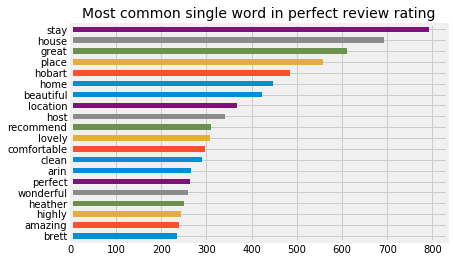

In [27]:
comment1 = X_1.sum().sort_values(ascending = False)
comment1.head(20).sort_values(ascending = True).plot(kind='barh')
comment1=pd.DataFrame(comment1)
plt.title('Most common single word in perfect review rating', fontsize=14)

In [28]:
#set minimum 2 words and maximum 3 words
cvt2 = CountVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(2,3))#set maximum 1 word
X_2 = pd.DataFrame(cvt2.fit_transform(df_listingwr_perfect_score.comments).todense(),
             columns=cvt2.get_feature_names())

Text(0.5,1,'Most common words in perfect review scores rating')

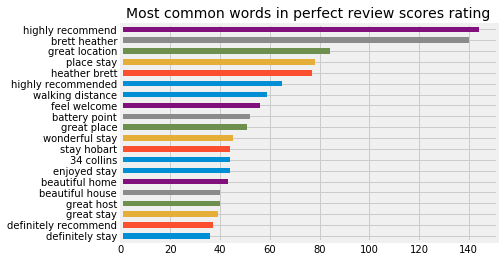

In [29]:
comment2 = X_2.sum().sort_values(ascending = False)
comment2.head(20).sort_values(ascending = True).plot(kind='barh')
comment2=pd.DataFrame(comment2)
plt.title('Most common words in perfect review scores rating', fontsize=14)

## Below 50 scores

In [30]:
df_listingwr_below_50 = df_listingwr[df_listingwr.review_scores_rating<50]

### TfidfVectorizer

In [31]:
cvt4 = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(2,2))#set maximum 1 word
X_6 = pd.DataFrame(cvt4.fit_transform(df_listingwr_below_50.comments).todense(),
             columns=cvt4.get_feature_names())

Text(0.5,1,'Most common words in review for super host')

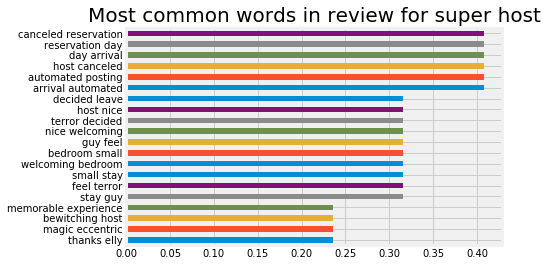

In [197]:
comment = X_6.sum().sort_values(ascending = False)
comment.head(20).sort_values(ascending = True).plot(kind='barh')
comment=pd.DataFrame(comment)
plt.title('The key words for bad reviews', fontsize=20)

How to avoid low overall score:
1. The host should not cancel the reservation especially on arrival day.
2. The traveller must not feel terrified and decided to leave
3. The bedroom must be big enough
4. The host should not be witching and eccentric

In [360]:
df_listingwr_sample=df_listingwr.sample(10000)
df_listingwr_sample.reset_index

<bound method DataFrame.reset_index of                  id      host_id  \
324579   17465305.0   98798133.0   
839688   18965218.0  132265679.0   
762080   14968316.0   69333118.0   
579994    2694037.0   19703653.0   
921398    1004937.0    5527404.0   
562766    1869390.0    9744028.0   
1009480  12211530.0    4415172.0   
929541    2156242.0   11004219.0   
279332   15515554.0    2418728.0   
798773   16458756.0    3601970.0   
578614    2547558.0   12979499.0   
415482   23506188.0  175550628.0   
372293   20625899.0   50335286.0   
169651    9330980.0   48427616.0   
1171157  11044338.0   52603434.0   
512050   19087407.0     119329.0   
111125    5863428.0   30440408.0   
747136   13915116.0   60827077.0   
316573   17012694.0    2707020.0   
47480     2327860.0    9198367.0   
923870    1382539.0    7341452.0   
515510   20937548.0  146226763.0   
1094666   2145860.0     435700.0   
696583   10106309.0   24792524.0   
1041031  16651845.0  110075398.0   
760079   14856867.0   583

In [361]:
#Train-test split
from sklearn.model_selection import train_test_split
X = df_listingwr_sample[['comments']]
y = df_listingwr_sample.host_is_superhost.apply(lambda x: 1 if x =='t' else 0 if x =='f' else x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=99) #can add in stratify=y


In [362]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [363]:
#lemmatize the text
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
X_train_lem = X_train.comments.apply(lemmatize_text)
X_train_lem = X_train_lem.apply(lambda x: " ".join(x))
X_test_lem = X_test.comments.apply(lemmatize_text)
X_test_lem = X_test_lem.apply(lambda x: " ".join(x))

import scipy as sp
#cant use pipeline if we want the vectorized text col names
cvect = CountVectorizer(max_features=50000, strip_accents='unicode', stop_words='english', ngram_range=(1,3), max_df=0.9, min_df=1)
vect_text_df_train = TfidfTransformer().fit_transform(cvect.fit_transform(X_train_lem))
#csr sparse matrix of non-text and text
y_train_csr = y_train.values.astype(np.float32) 
X_train_csr = sp.sparse.hstack((vect_text_df_train, X_train.drop('comments', axis=1).values),format='csr')
X_train_csr_cols = cvect.get_feature_names()+X_train.drop('comments', axis=1).columns.tolist()
print X_train_csr.toarray()
print X_train_csr_cols[:10]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[u'00', u'000', u'00am', u'10', u'10 10', u'10 10 great', u'10 10 host', u'10 10 recommend', u'10 10 thanks', u'10 12']


In [364]:
#csr test dataset as well
y_test_csr = y_test.values.astype(np.float32) 
X_test_csr = sp.sparse.hstack((vect_text.fit(X_train_lem).transform(X_test_lem),X_test.drop('comments', axis=1).values),format='csr')

In [ ]:
#Not enough Memory to run this
auc_ls = []
f1_ls = []
precision_ls = []
roc_auc, f1_score, precision_score = model_performance(LogisticRegression(), X_train_csr, y_train_csr[:,i], X_test_csr[:,0:520], y_test_csr[:,0:520])
auc_ls.append(roc_auc)
f1_ls.append(f1_score)
precision_ls.append(precision_score)
scores = [auc_ls, f1_ls, precision_ls]
metrics = pd.DataFrame(scores, columns=cat, index=(['auc','f1','presc']))
metrics